##### 샘플 데이터

In [1]:
import pandas as pd
# numpy : 숫자 수치 나타내거나 계산
# import numpy as np

In [2]:
df=pd.read_excel('로픽별파일/컬처케어.xlsx')
df.head()

,time,review
0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...
1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...
2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...
3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...
4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...


# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [3]:
import re
from tqdm import tqdm

In [4]:
# r : 특수기호를 문자로 인식[\\s] -> [\s]
# s = 공백 / ^ = not

In [5]:
# 알파벳, 숫자, 공백, 한글 문자를 제외한 나머지를 제거
# 리뷰가 길어지는 경우 문장 구분을 위해 .?! 보존
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

In [6]:
new_review = [] # 클렌징한 리뷰가 담길 리스트

for r in tqdm(df.review):
  text = re.sub(pattern,"",r)
  new_review.append(text)

df['Review_clean'] = new_review

100%|██████████| 730/730 [00:00<00:00, 52320.40it/s]


In [7]:
df.head()

,time,review,Review_clean
0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...
1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...
2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...
3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...
4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...


### 1.2. 의미없는 짧은 글 제거

In [8]:
# enumerate : 데이터와 데이터 위치값(인덱스값)도 함께 꺼내준다.

In [9]:
# 길이가 10글자 미만이면 삭제
for i, review in enumerate(tqdm(df.Review_clean)):
  if len(review) < 10:
    df = df.drop(i)

100%|██████████| 730/730 [00:00<00:00, 732848.71it/s]


In [10]:
df

,time,review,Review_clean
0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...
1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...
2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...
3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...
4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...
...,...,...,...
725,2021. 9. 14. 16:05,트센터 위 포스터를 클릭하시면 해당 공연 예매 사이트로 바로 이동합니다 OPEN F...,트센터 위 포스터를 클릭하시면 해당 공연 예매 사이트로 바로 이동합니다 OPEN F...
726,2021. 5. 16. 11:09,지엄 겨울 방학 정규 수업 후 모처럼 마르첼로 바렌기전 수업에 다녀왔습니다 친구들과...,지엄 겨울 방학 정규 수업 후 모처럼 마르첼로 바렌기전 수업에 다녀왔습니다 친구들과...
727,2020. 7. 28. 22:09,울아트센터 어쩌면 처음 보는 예술 놀라움을 넘어 서늘함을 전하는이 여름에 특별한 피...,울아트센터 어쩌면 처음 보는 예술 놀라움을 넘어 서늘함을 전하는이 여름에 특별한 피...
728,2020. 7. 1. 8:20,장 기다렸던 전시 르네 마그리트 특별전 드디어 다녀왔다 비록 원화는 없었지만 멀티미...,장 기다렸던 전시 르네 마그리트 특별전 드디어 다녀왔다 비록 원화는 없었지만 멀티미...


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [11]:
# konlpy : 한국어 형태소 분석
# Okt : 트위터 오픈소스 한국어 처리

In [12]:
# !pip install konlpy

In [13]:
from konlpy.tag import Okt
okt=Okt()

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [14]:
#불용어 가져오기 + 리스트화
stopwords_df = pd.read_csv('ko-stopwords.csv')
stopwords_df

,stopwords
0,가
1,가까스로
2,가령
3,각
4,각각
...,...
594,힘입어
595,하다
596,이다
597,되다


In [15]:
stopwords = list(stopwords_df['stopwords'])
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [16]:
#원하는 태그 추출 & 불용어 제거

def okt_pos_tagging(string): # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True) # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords: # 불용어 목록에 들어있지 않으면
                tagged_list.append(word) # 리스트 목록에 추가해라
    if len(tagged_list) == 0 :
      tagged_list.append("None")
    return tagged_list

In [17]:
# test
okt_pos_tagging(df.Review_clean[0])

['노',
 '키즈',
 '존',
 '세',
 '이하',
 '입장',
 '불가',
 '일요일',
 '간만',
 '일찍',
 '점',
 '먹다',
 '낮잠',
 '쿨쿨',
 '자다',
 '뽈뽈',
 '부부',
 '외출',
 '저번',
 '가다',
 '신상',
 '카페',
 '가보다',
 '주차장',
 '차',
 '타고',
 '오다',
 '꼭',
 '주차',
 '관리',
 '해주다',
 '분',
 '안내',
 '후문',
 '쪽',
 '우린',
 '주차',
 '함',
 '문',
 '후문',
 '정문',
 '사진',
 '미치다',
 '찍다',
 '후문',
 '들어오다',
 '왼쪽',
 '편',
 '통',
 '유리',
 '테라스',
 '추다',
 '않다',
 '탁',
 '트이다',
 '기분',
 '커피',
 '잔',
 '여유',
 '즐기다',
 '생각',
 '테이블',
 '많다',
 '복도',
 '쪽',
 '화장실',
 '화장실',
 '마',
 '지다',
 '분위기',
 '갑인',
 '말다',
 '영화',
 '보다',
 '비밀',
 '문',
 '안',
 '단체',
 '석',
 '앉다',
 '분',
 '계시다',
 '사진',
 '생략',
 '초',
 '코스',
 '론',
 '아이스',
 '아메리카노',
 '연유',
 '라떼',
 '달',
 '않다',
 '좋다',
 '초코',
 '커피',
 '만족',
 '층',
 '올라가다',
 '계단',
 '거울',
 '샷',
 '필수',
 '층',
 '창가',
 '뷰',
 '야외',
 '테라스',
 '따뜻하다',
 '마시다',
 '부서',
 '방',
 '야외',
 '말다',
 '싶다',
 '자리',
 '잡다',
 '미안하다',
 '춥다',
 '자리',
 '비다',
 '냉큼',
 '자리',
 '잡기',
 '사진',
 '찍다',
 '달라',
 '확대',
 '샷',
 '머리',
 '눈',
 '나오다',
 '샷',
 '나름',
 '건지다',
 '봐쥼',
 '화장실',
 '다녀오다',
 '가볍다',
 '상쾌하다',
 '내',
 '맘',
 '그대

### 2.2 데이터 프레임에 추가

In [18]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.review):
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)

100%|██████████| 730/730 [00:53<00:00, 13.72it/s]


In [19]:
df['tagged_review'] = tagged_review
df.head(100)

,time,review,Review_clean,tagged_review
0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,"[노, 키즈, 존, 세, 이하, 입장, 불가, 일요일, 간만, 일찍, 점, 먹다, ..."
1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,"[쉬다, 모르다, 오늘, 빼빼로데이, 잖다, 우왓, 퀸, 퀸, 스, 페이, 들다, ..."
2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,"[불다, 필름, 카메라, 찍기, 아침, 일찍, 일어나서, 박콩, 산책, 일찍, 일어..."
3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,"[표지, 글, 분위기, 안, 어울리다, 강렬하다, 벽, 뒤, 슬그머니, 피해, 야하..."
4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,"[쉬다, 않다, 은셔, 한국, 서다, 제일, 친해지다, 생각나다, 김, 은서, 아이..."
...,...,...,...,...
95,2021. 9. 13. 2:57,럽 갔다 왔어요 전시 이름은 극소 바캉스 일본어 몰라서 예뻐 보임이해하면 그냥 음향...,럽 갔다 왔어요 전시 이름은 극소 바캉스 일본어 몰라서 예뻐 보임이해하면 그냥 음향...,"[럽, 가다, 오다, 전시, 이름, 극소, 바캉스, 일본어, 모르다, 예쁘다, 보임..."
96,2021. 5. 25. 15:13,오늘 제 유튜브 알고리즘이 이 영상을 추천해주더라고요무한히 살고 싶게 만드는 노래베...,오늘 제 유튜브 알고리즘이 이 영상을 추천해주더라고요무한히 살고 싶게 만드는 노래베...,"[오늘, 유튜브, 알고리즘, 영상, 추천, 해주다, 무한, 살, 싶다, 만들다, 노..."
97,2021. 7. 1. 15:47,관념적여름 와 여름이다날씨가 미쳤죠 비가 분에 한 번씩 오다 그치다 습하고 꿉꿉하고...,관념적여름 와 여름이다날씨가 미쳤죠 비가 분에 한 번씩 오다 그치다 습하고 꿉꿉하고...,"[관념, 여름, 오다, 여름, 날씨, 미치다, 비, 분, 번, 오다, 그치다, 습하..."
98,2021. 4. 13. 6:11,갔다 코로나 시대에 몇 없는 오프 J양은 사이버 가좍들과의 모임도 오프라고 하던데...,갔다 코로나 시대에 몇 없는 오프 J양은 사이버 가좍들과의 모임도 오프라고 하던데...,"[가다, 코로나, 시대, 없다, 오프, 양은, 사이버, 가다, 좍, 모임, 오프, ..."


In [20]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [21]:
# 문서마다 고유한 document 번호 부여
# doc2vec
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 730


In [22]:
model = doc2vec.Doc2Vec(vector_size=300, min_count=5, epochs=10, window=5, workers=4)

model.build_vocab(tagged_corpus_list)

model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=4)

In [23]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)

100%|██████████| 730/730 [00:00<00:00, 293673.69it/s]


In [24]:
df['vector'] = vector_list

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

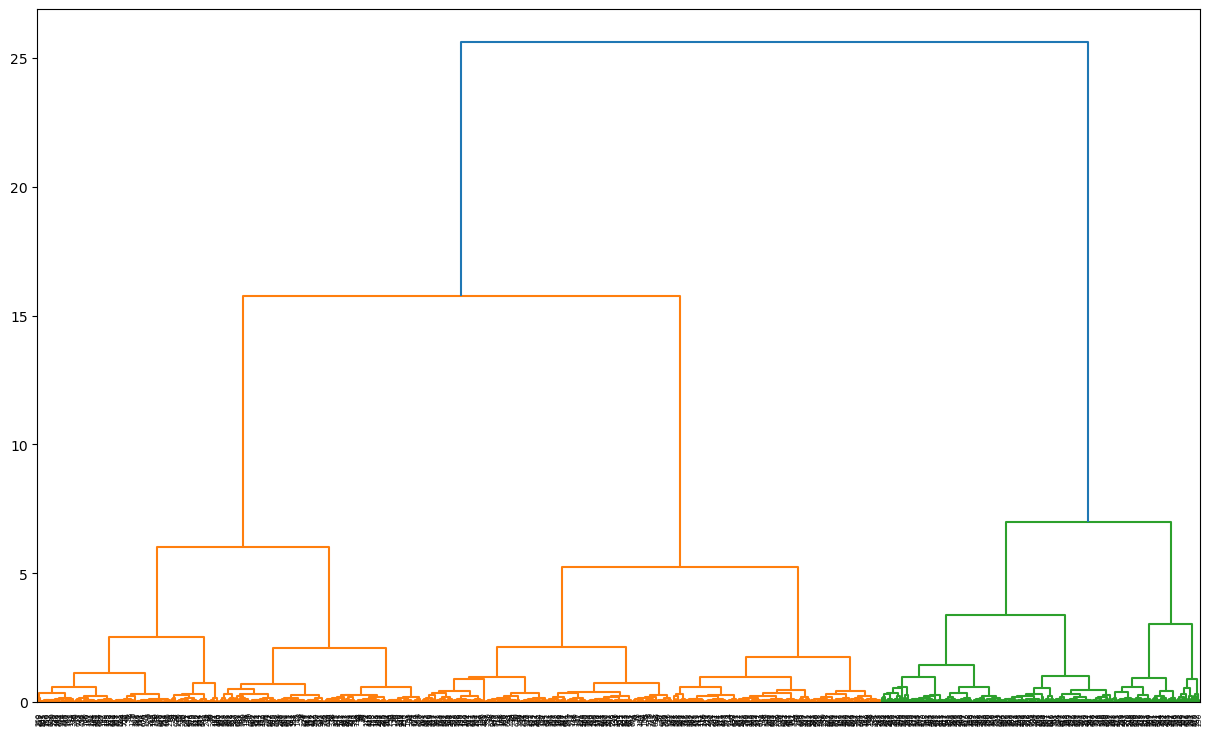

In [26]:
linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9)) #인치
dendrogram(linked,
            orientation='top',# 위에서부터 아래로
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [27]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [28]:
#2개로만 뽑아보기

cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)

In [29]:
silhouette_avg

0.5331507

In [30]:
n_clutser=[]
clustering_score = []
for i in tqdm(range(2, 30)): # 군집을 2개부터 29개까지 만들것이다.
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

100%|██████████| 28/28 [00:01<00:00, 20.96it/s]


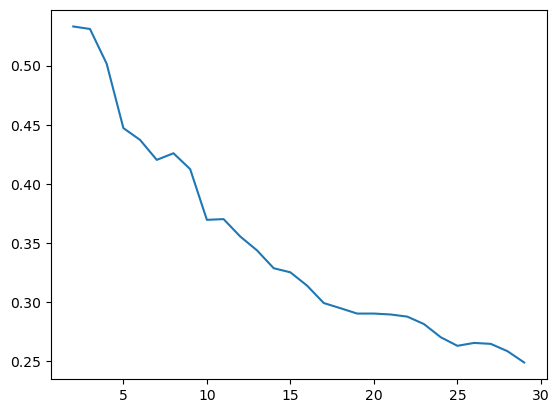

In [31]:
# 시각화 코드
plt.plot(n_clutser, clustering_score)

In [32]:
# 그래프 데이터프레임
result = pd.DataFrame({'n_cluster':n_clutser, 'score':clustering_score})
result

,n_cluster,score
0,2,0.533151
1,3,0.531036
2,4,0.501605
3,5,0.447132
4,6,0.437119
5,7,0.420214
6,8,0.425810
7,9,0.412385
8,10,0.369457
9,11,0.370063


In [33]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

,time,review,Review_clean,tagged_review,vector,cluster
0,2020. 3. 9. 0:31,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,"[노, 키즈, 존, 세, 이하, 입장, 불가, 일요일, 간만, 일찍, 점, 먹다, ...","[0.01713779, 0.074200645, -0.007542223, -0.019...",2
1,2020. 11. 11. 10:49,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,"[쉬다, 모르다, 오늘, 빼빼로데이, 잖다, 우왓, 퀸, 퀸, 스, 페이, 들다, ...","[0.04649607, 0.19131269, -0.012071299, -0.0469...",0
2,2021. 3. 22. 10:56,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,"[불다, 필름, 카메라, 찍기, 아침, 일찍, 일어나서, 박콩, 산책, 일찍, 일어...","[0.036170352, 0.15929508, -0.011990719, -0.048...",0
3,2021. 9. 21. 0:42,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,"[표지, 글, 분위기, 안, 어울리다, 강렬하다, 벽, 뒤, 슬그머니, 피해, 야하...","[0.030554451, 0.11293533, -0.012335406, -0.031...",4
4,2021. 9. 11. 21:29,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,"[쉬다, 않다, 은셔, 한국, 서다, 제일, 친해지다, 생각나다, 김, 은서, 아이...","[0.023842398, 0.09049149, -0.006822316, -0.024...",4


In [34]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
#각 클러스터들을 하나의 문서로 가정
all_document=[]
for i in df['cluster'].unique(): # 0~5군집까지

    #각 클러스터들을 하나의 문서로 가정
    #데이터 프레임에서 추출하여 tagged_Review를 join을 이용하여 합치기
    pos_tagged = df[df['cluster']==i].tagged_review # boolen indexing : 해당 군집에 있는 데이터만 추출

    #포스태깅된 데이터들을 공백 기준으로 하나로 합쳐 하나의 document로 생성
    cluster_document=''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)

In [36]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)

In [37]:
# 각 단어와 TF-IDF 값을 확인
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
tf_idf_df

,가가,가각,가감,가객,가거도,가게,가격,가격표,가곡,가곡제주,...,힘차다,힙니,힙돌이,힙스터,힙알못,힙지,힙한가,힙함,힙합,힝힝
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.006687,0.004012,0.000000,0.001337,0.000000,...,0.000000,0.000000,0.000000,0.002807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001671,0.001248,0.000624,0.000000,0.000624,0.006837,0.011297,0.000624,0.000595,0.000000,...,0.003523,0.000000,0.000000,0.000000,0.000624,0.000624,0.000624,0.000503,0.002109,0.000624
2,0.001367,0.000000,0.000000,0.001646,0.000000,0.003890,0.008752,0.000000,0.000972,0.000000,...,0.000000,0.002041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004599,0.000000
3,0.000000,0.000000,0.000000,0.002528,0.000000,0.003981,0.014929,0.000000,0.004976,0.001044,...,0.002528,0.000000,0.001044,0.000000,0.000000,0.000000,0.000000,0.000843,0.005295,0.000000
4,0.001478,0.000000,0.000000,0.000000,0.000000,0.005258,0.013671,0.000000,0.002103,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004973,0.000000


In [38]:
#행과 열 변환
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2,3,4
가가,0.0,0.001671,0.001367,0.000000,0.001478
가각,0.0,0.001248,0.000000,0.000000,0.000000
가감,0.0,0.000624,0.000000,0.000000,0.000000
가객,0.0,0.000000,0.001646,0.002528,0.000000
가거도,0.0,0.000624,0.000000,0.000000,0.000000
...,...,...,...,...,...
힙지,0.0,0.000624,0.000000,0.000000,0.000000
힙한가,0.0,0.000624,0.000000,0.000000,0.000000
힙함,0.0,0.000503,0.000000,0.000843,0.000000
힙합,0.0,0.002109,0.004599,0.005295,0.004973


In [39]:
for i in tqdm(tf_idf_df_transposed.columns):

    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word':tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    data_df.to_csv('data/Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 5/5 [00:00<00:00, 26.71it/s]
